### We are using the free glass datset.The objective is to tell the type of glass based on amount of other elements present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data = pd.read_csv("glass.data")
data.head()

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# Check for null values
data.isna().sum()

index    0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

In [5]:
# drop columns ' Index' and 'Class' as we need to normalize the features
data = data.drop(['index','Class'], axis=1)

In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


We’ll go ahead and standardise this data as all of the data are on a different scale.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [10]:
df = pd.DataFrame(data = scaled_data, columns = data.columns)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


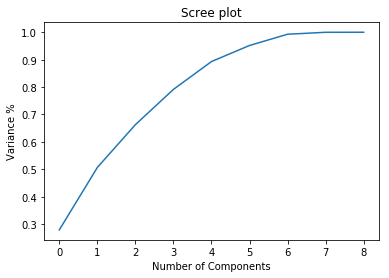

In [12]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(df)

plt.figure()
plt.plot( np.cumsum( pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance %")
plt.title("Scree plot")
plt.show()

From the diagram above, it can be seen that 4 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [15]:
pca = PCA(n_components = 4)
new_data = pca.fit_transform(df)
principal_df = pd.DataFrame( data= new_data, columns= ['PC1', 'PC2', 'PC3', 'PC4'])
principal_df

,PC1,PC2,PC3,PC4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102
...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611
210,-2.397652,3.108236,-1.117502,0.288454
211,-1.680246,3.284823,-0.930349,-0.171014
212,-2.369748,2.756873,-1.234701,-0.525285


Here, we see that earlier we had 9 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 4. This is the advantage of PCA. It drastically reduces the number of features, thereby considerably reducing the training time for the model.

In [17]:
print(pca.explained_variance_)
print ('\n')
print(pca.components_)

[2.52295323 2.05969694 1.41143951 1.16329842]


[[ 0.54517662 -0.2581256   0.11088095 -0.42870863 -0.22883635 -0.21934405
   0.49230609 -0.25037512  0.18584154]
 [ 0.28568318  0.27035007 -0.59355826  0.29521154 -0.15509891 -0.15397013
   0.3453798   0.48470218 -0.06203879]
 [ 0.08691083 -0.38491962  0.00841796  0.32923712 -0.45870884  0.66257412
  -0.00098473  0.07405473  0.28445055]
 [ 0.14738099  0.49124204  0.37878577 -0.13750592 -0.65253771 -0.03853544
  -0.27644322  0.13317545 -0.23049202]]


In [21]:
#Lets see what if we keep 95% of variance

pca1 = PCA(0.95)
data = pca1.fit_transform(df)

print (df.shape)
print (data.shape)

(214, 9)
(214, 6)
